In [1]:
from VideoPoseEstimationModel import VideoPoseEstimator

from PIL import Image
from PIL import ImageDraw

import torchvision.transforms as transforms

import cv2

/home/jhpahk/anaconda3/envs/ugrp/lib/python3.8/site-packages/mmpose/models/registry.py:9: DeprecationWarning: Registries (BACKBONES, NECKS, HEADS, LOSSES, POSENETS) have been moved to mmpose.models.builder. Importing from mmpose.models.registry will be deprecated in the future.
  warnings.warn(


In [2]:
# img = Image.open("data/images/test/000005_mpiinew_test/000000.jpg")
# img_original = img

# img = img.resize((256, 256))
# img = transforms.ToTensor()(img).unsqueeze(0)

cap = cv2.VideoCapture("sample_joohyun.mp4")

ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = Image.fromarray(frame)

img_original = img.resize((256, 256))

img = img.resize((256, 256))
img = transforms.ToTensor()(img).unsqueeze(0)

model = VideoPoseEstimator(N=3)
joints = model(img)
print(joints)

/home/jhpahk/anaconda3/envs/ugrp/lib/python3.8/site-packages/mmpose/models/detectors/top_down.py:61: DeprecationWarning: `loss_pose` for TopDown is deprecated, use `loss_keypoint` for heads instead. See https://github.com/open-mmlab/mmpose/pull/382 for more information.
  warnings.warn(
/home/jhpahk/anaconda3/envs/ugrp/lib/python3.8/site-packages/mmpose/deprecated.py:110: DeprecationWarning: TopDownSimpleHead has been renamed into TopdownHeatmapSimpleHead, check https://github.com/open-mmlab/mmpose/pull/656 for details.
  warnings.warn(


Lite-HRNet
[(tensor(117), tensor(210)), (tensor(117), tensor(194)), (tensor(113), tensor(138)), (tensor(157), tensor(141)), (tensor(153), tensor(186)), (tensor(150), tensor(210)), (tensor(134), tensor(141)), (tensor(122), tensor(69)), (tensor(121), tensor(58)), (tensor(125), tensor(14)), (tensor(50), tensor(126)), (tensor(73), tensor(110)), (tensor(85), tensor(70)), (tensor(150), tensor(66)), (tensor(194), tensor(94)), (tensor(233), tensor(110))]


/home/jhpahk/anaconda3/envs/ugrp/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/home/jhpahk/anaconda3/envs/ugrp/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630815121/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [3]:
# invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
#                                                      std = [ 1/0.229, 1/0.224, 1/0.225 ]),
#                                 transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
#                                                      std = [ 1., 1., 1. ]),
#                                ])

# to_PIL = transforms.ToPILImage()


# img1_ori = invTrans(img1).squeeze()
# img1_ori_PIL = to_PIL(img1_ori)
# img1_ori_PIL

In [4]:
def pil_draw_point(image, point):
    x, y = point
    draw = ImageDraw.Draw(image)
    radius = 2
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill=(0, 0, 255))

    return image

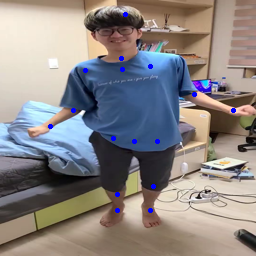

In [5]:
# draw = ImageDraw.Draw(img0_ori_PIL)
# draw.line((annot0[0], annot0[0]), width=5)
# draw.line((annot0[1], annot0[1]), width=5)

# img0_ori_PIL

img_draw = img_original

for i in range(len(joints)):
    if joints[i] == None:
        continue
    img_draw = pil_draw_point(img_draw, joints[i])

img_draw

In [6]:
# img1_ori = invTrans(img1).squeeze()
# img1_ori_PIL = to_PIL(img1_ori)
# img1_ori_PIL

# img1_annoted = img1_ori_PIL
# for i in range(len(annot1)):
#     if annot1[i] == 0:
#         continue
#     img1_annoted = pil_draw_point(img1_annoted, annot1[i])

# img1_annoted